<a href="https://colab.research.google.com/github/Priyabrat845/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
pip install shap

     |████████████████████████████████| 358kB 5.1MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491615 sha256=c48d5c69956cd6333009ff8a70dee95183167f3d0115ebe333fc0289707d4f2c
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
#Importing all the libarary
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as met
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly.express as px
#import shap
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bike_sharing=pd.read_csv('/content/drive/MyDrive/Almabetter/SeoulBikeData.csv',encoding= 'unicode_escape',date_parser="Date")
bike_sharing.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike_sharing.shape

(8760, 14)

In [ ]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
bike_sharing.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,02/04/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
bike_sharing.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Extracting the features from date.
bike_sharing['Date']=pd.to_datetime(bike_sharing['Date'])
bike_sharing['Year'] = pd.DatetimeIndex(bike_sharing['Date']).year
bike_sharing['Day'] = pd.DatetimeIndex(bike_sharing['Date']).day
bike_sharing['Month']= pd.DatetimeIndex(bike_sharing['Date']).month
bike_sharing['weekday']=pd.DatetimeIndex(bike_sharing['Date']).weekday

In [ ]:
bike_sharing.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3


In [ ]:
bike_sharing['weekday'].unique()

array([3, 6, 2, 4, 0, 5, 1])

The weekday is in range 0-6. so we need to make it as normal 1-7.

In [ ]:
bike_sharing['weekday']=bike_sharing['weekday']+1
bike_sharing['weekday'].unique()

array([4, 7, 3, 5, 1, 6, 2])

In [ ]:
bike_sharing.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4


In [ ]:
Rented_bike_per_Weekday=pd.DataFrame(bike_sharing.groupby(['weekday'])['Rented Bike Count'].sum())
Rented_bike_per_Weekday

,Rented Bike Count
weekday,
1,863563
2,862877
3,908871
4,928267
5,898966
6,911475
7,798295


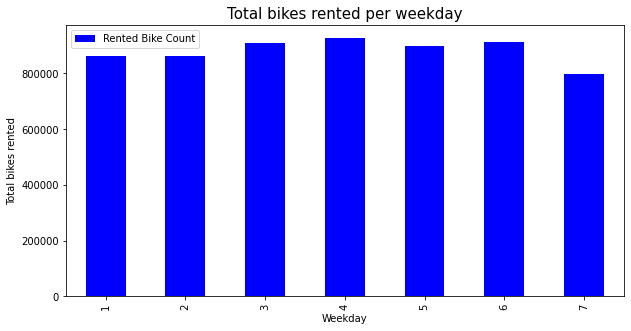

In [ ]:
pd.DataFrame(bike_sharing.groupby(['weekday'])['Rented Bike Count'].sum()).plot.bar(color='blue',figsize=(10,5))
plt.xlabel('Weekday')
plt.ylabel('Total bikes rented')
plt.title('Total bikes rented per weekday',size=15)
plt.show()

We can clearly see that Sunday has the heighest total number of bikes rented.

In [ ]:
bike_sharing['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

2018 year has the heighest booked bikes. 

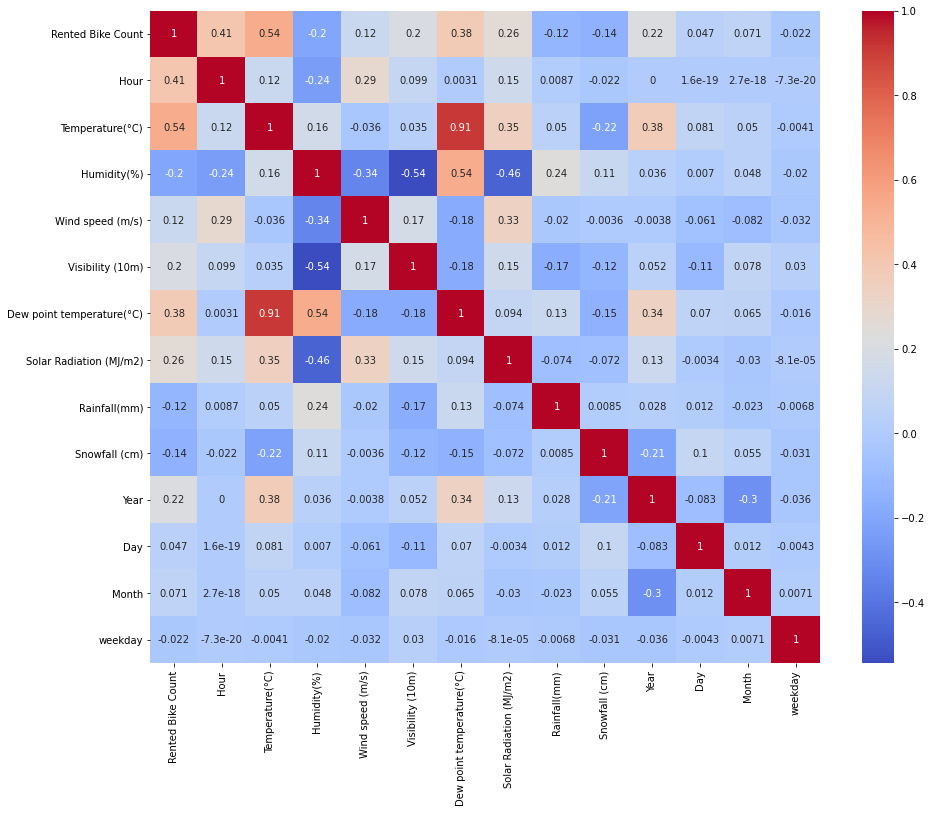

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(bike_sharing.corr(),annot=True,cmap="coolwarm")

**We can see that on the target variable line the most correlated variables to the rent are :**

the hour

the temperature

the dew point temperature

the solar radiation

and also there is a hyper correlation between columns 'Temperature(°C)' and 'Dew point temperature(°C)' so we can drop the column 'Dew point temperature(°C)'. And they have the same variations.

In [ ]:
bike_sharing=bike_sharing.drop(['Dew point temperature(°C)'],axis=1)
bike_sharing.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4


## **Data Preparation and Visualisation**

In [ ]:
# Creating a variable which informs us if it is night or day.
bike_sharing['label_day_night']=bike_sharing['Hour'].apply(lambda x: 'Night' if (x>20 or x<5) else 'Day')
bike_sharing.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday,label_day_night
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,Night
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,Night
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,Night


In [ ]:
bike_sharing['label_day_night'].value_counts()

Day      5840
Night    2920
Name: label_day_night, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff1d0491090>,
 [Text(-0.6000000648665187, 1.0392304470906217, 'Day'),
  Text(0.5500001486524352, -0.9526278583383436, 'Night')])

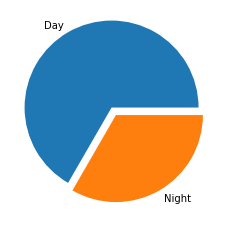

In [ ]:
plt.pie(bike_sharing['label_day_night'].value_counts(),labels=['Day','Night'],explode=[0.1,0.0])

According to this pie chart there are much more rents(Approx 50%) during the day than the night.

Text(0.5, 1.0, 'Bikes rented in different hours of day')

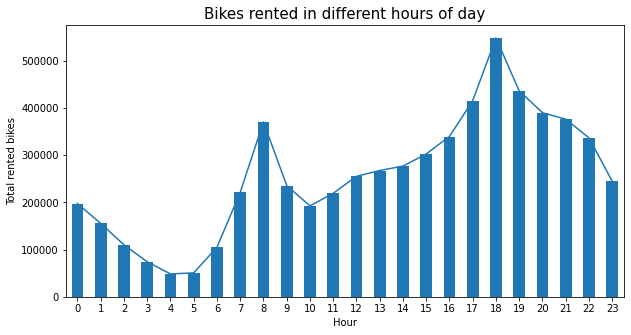

In [ ]:
bike_sharing.groupby('Hour')['Rented Bike Count'].sum().plot.bar(figsize=(10,5))
bike_sharing.groupby('Hour')['Rented Bike Count'].sum().plot()
plt.ylabel('Total rented bikes')
plt.title('Bikes rented in different hours of day',size=15)

From this above graph we can see that, at morning(8AM,9AM) and evening(6PM,7PM) has the heighest rented bikes demand.

In [ ]:
bike_sharing['Months_lab'] = bike_sharing['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})


In [ ]:
#month_year_group=bike_sharing.groupby(by=['Month','Months_lab','Year'])['Rented Bike Count'].sum()
month_year_group= bike_sharing.groupby(by=['Month','Months_lab','Year']).agg({'Rented Bike Count':'sum'}).reset_index()
month_year_group

,Month,Months_lab,Year,Rented Bike Count
0,1,January,2017,9539
1,1,January,2018,277705
2,2,February,2017,8523
3,2,February,2018,255589
4,3,March,2017,7222
5,3,March,2018,447815
6,4,April,2017,8729
7,4,April,2018,547490
8,5,May,2017,8307
9,5,May,2018,657641


In [ ]:
px.bar(month_year_group,y= 'Rented Bike Count',x='Months_lab' ,facet_row= 'Year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=800, height=600)


From the above graph we can see that:

There's is a whooping increase in number of bike rents in year 2018.

In the last month the demand decreases in 2018 but increases in it seen to be increasing in the end of 2017. It is like this because, in 2017 the demand is taking off and we can see the pattern as it is still inceasing in the beginning months of 2018.

There is a decline in the end of the year. This could be repercussions of winter season as well.

In [ ]:
bike_sharing.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday,label_day_night,Months_lab
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,Night,January
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,Night,January
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,Night,January


In [ ]:
# Let's find the number of bikes rented for each season.
Rented_bike_seasons= bike_sharing.groupby(by=['Year','Seasons']).agg({'Rented Bike Count':'sum'}).reset_index()
px.bar(Rented_bike_seasons,y= 'Rented Bike Count',x= 'Seasons',facet_col='Year',title='Total Rented Bikes in diffrent Seasons in 2017 and 2018',width=800, height=500)

We can clearly see that:

1. For 2017, in Winter season the demand of rented bike was at the peak.

2. But in case of 2018, Summer season had the heighest demand.

In [ ]:
bike_sharing['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff1ccd92d90>,
 [Text(-1.1856271834069467, 0.18517068333435097, 'No holiday'),
  Text(1.0868249042173679, -0.16973988209289403, 'holiday')])

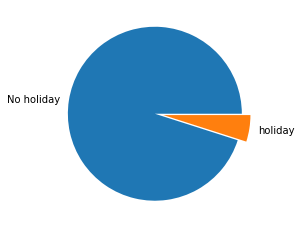

In [ ]:
plt.pie(bike_sharing['Holiday'].value_counts(),labels=['No holiday','holiday'],explode=[0.1,0.0])

In [ ]:
bike_sharing.groupby('Holiday')['Rented Bike Count'].sum()

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa2b46efdd0>,
 [Text(1.192762257753094, 0.13159861883675483, 'holiday'),
  Text(-1.0933654043521348, -0.12063205447099314, 'No holiday')])

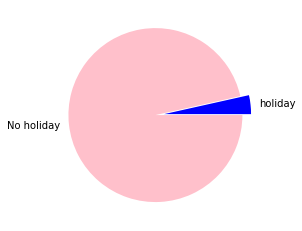

In [ ]:
plt.pie(bike_sharing.groupby('Holiday')['Rented Bike Count'].sum(),labels=['holiday','No holiday'],explode=[0.1,0.0],colors=['blue','pink'])

On holidays people are not booking the rented bikes more as compared to the other working days.

Text(0, 0.5, 'Average bikes booked')

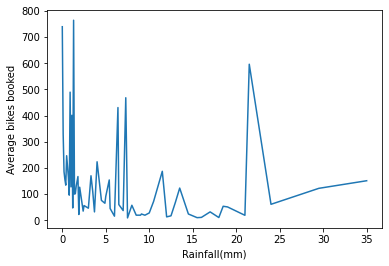

In [ ]:
bike_sharing.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()
plt.ylabel('Average bikes booked')

From the above graph we can see that even if it rains a lot of people have rented bikes,for example even if we have 20 mm of rain there is a big peak of rented bikes.

In [ ]:
# Checking the dataset for the rainfall between 20 & 25mm.
bike_sharing[(bike_sharing['Rainfall(mm)']>20)&(bike_sharing['Rainfall(mm)']<25)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday,label_day_night,Months_lab
5034,2018-06-28,596,18,20.6,97,0.7,222,0.14,21.5,0.0,Summer,No Holiday,Yes,2018,28,6,4,Day,June
5132,2018-02-07,61,20,23.5,97,0.1,1814,0.04,24.0,0.0,Summer,No Holiday,Yes,2018,7,2,3,Day,February
6524,2018-08-29,19,20,23.4,98,0.6,70,0.00,21.0,0.0,Summer,No Holiday,Yes,2018,29,8,3,Day,August


We can see that, these days of rainfall are in the summer and the T° is not bad, furthermore theses are Week Days, that's why we have so much rented bike even if the rain is so heavy.

In [ ]:
for i in bike_sharing.describe().columns:
  if i not in ['Rented Bike Count','Year','Day','Month','weekday','Hour']:
    display(px.scatter(bike_sharing,i,'Rented Bike Count',trendline="ols",trendline_color_override='yellow',opacity=0.6,title=f"{i} and Rented Bike Count"),width=500,length=500)

From the above graphs we can see that:

1.Number of bikes rented is most positively correlated to Temperature and Dew Point Temperature.

2.Number of bikes rented is most negatively correlated Snowfall (cm) and Humidity

In [ ]:
bike_sharing.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday,label_day_night,Months_lab
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,Night,January
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,Night,January
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,Night,January


In [ ]:
# Label encoding and one-hot encoding.
bike_sharing = bike_sharing.replace({'No':0,'Yes':1,'Holiday':1,'No Holiday':0,'Day':1,'Night':0})

In [ ]:
season_dummy = pd.get_dummies(bike_sharing['Seasons'])
for i in season_dummy.columns:
  bike_sharing[i]= season_dummy[i]
bike_sharing.drop('Seasons',axis='columns',inplace=True)
bike_sharing.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Day,Month,weekday,label_day_night,Months_lab,Autumn,Spring,Summer,Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,2017,12,1,4,0,January,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,2017,12,1,4,0,January,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,2017,12,1,4,0,January,0,0,0,1


In [ ]:
# Removing the unnecessary columns from our dataset.
bike_sharing.drop(['Date','Months_lab'],axis=1,inplace=True)
bike_sharing.head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Day,Month,weekday,label_day_night,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,2017,12,1,4,0,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,2017,12,1,4,0,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,2017,12,1,4,0,0,0,0,1


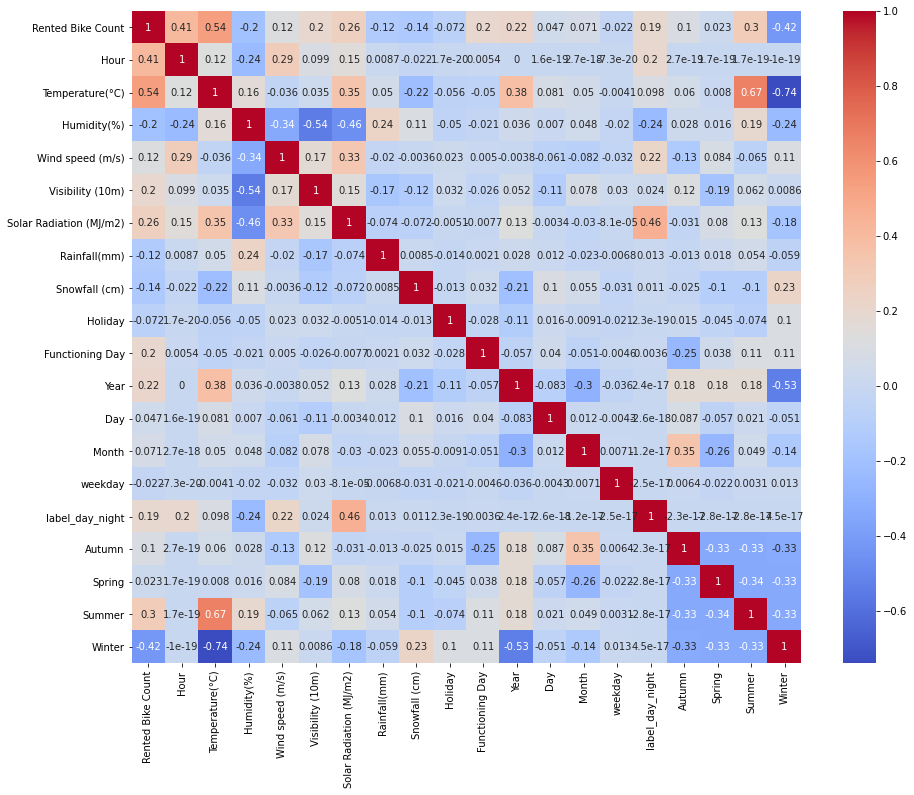

In [ ]:
# Let's check the collinearilty among the various variables.
plt.figure(figsize=(15,12))
sns.heatmap(bike_sharing.corr(),annot=True,cmap="coolwarm")

From the above heatmap we can see that, there is not much colleniarity among the features.

In [ ]:
# Checking the VIF scores of each features.
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(bike_sharing[[i for i in bike_sharing.describe().columns if i not in ['Rented Bike Count','Month','Functioning Day','Year','Day','weekday']]])

,variables,VIF
0,Hour,1.232014
1,Temperature(°C),5.019371
2,Humidity(%),2.626782
3,Wind speed (m/s),1.302111
4,Visibility (10m),1.689272
5,Solar Radiation (MJ/m2),2.239839
6,Rainfall(mm),1.073398
7,Snowfall (cm),1.113536
8,Holiday,1.022881
9,label_day_night,1.333841


## **Model Building**

In [ ]:
x=bike_sharing.drop('Rented Bike Count',axis=1)
y=bike_sharing['Rented Bike Count']
x.head(3)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Day,Month,weekday,label_day_night,Autumn,Spring,Summer,Winter
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,2017,12,1,4,0,0,0,0,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,2017,12,1,4,0,0,0,0,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,2017,12,1,4,0,0,0,0,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)
print('Shape of X training dataset:',x_train.shape)
print('Shape of X testing dataset:',x_test.shape)
print('Shape of y training dataset:',y_train.shape)
print('Shape of y testing dataset:',y_test.shape)

Shape of X training dataset: (7008, 19)
Shape of X testing dataset: (1752, 19)
Shape of y training dataset: (7008,)
Shape of y testing dataset: (1752,)


## **Linear Regression Model**

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
train_pred = lr.predict(x_train)
lr.score(x_train,y_train)

0.5595174050540407

In [ ]:
met.r2_score(y_train,lr.predict(x_train))

0.5595174050540407

In [ ]:
met.r2_score(y_test,lr.predict(x_test))

0.5498758852927934

The scores for the linear regression in very less. So we need to improve the model performance.

## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
for min_sam_leaf in range(1,50):
  DT_reg = DecisionTreeRegressor(criterion='mse',min_samples_leaf=min_sam_leaf)
  DT_reg.fit(x_train,y_train)
  print(f"\nR-sqared on train dataset when min leaf {min_sam_leaf} : {met.r2_score(y_train,DT_reg.predict(x_train))}")
  print(f"R-sqared on test dataset when min leaf {min_sam_leaf}: {met.r2_score(y_test,DT_reg.predict(x_test))}")
  print(f"Mean absolute error on test dataset when min leaf {min_sam_leaf}: {met.mean_absolute_error(y_test,DT_reg.predict(x_test))}")
  print(f"Mean squared error on test dataset when min leaf {min_sam_leaf}: {met.mean_squared_error(y_test,DT_reg.predict(x_test))}")


R-sqared on train dataset when min leaf 1 : 1.0
R-sqared on test dataset when min leaf 1: 0.7831780348047866
Mean absolute error on test dataset when min leaf 1: 161.53881278538813
Mean squared error on test dataset when min leaf 1: 85937.98744292237

R-sqared on train dataset when min leaf 2 : 0.9875378255759151
R-sqared on test dataset when min leaf 2: 0.7972928369463794
Mean absolute error on test dataset when min leaf 2: 156.68607305936072
Mean squared error on test dataset when min leaf 2: 80343.54645484526

R-sqared on train dataset when min leaf 3 : 0.9737843584879295
R-sqared on test dataset when min leaf 3: 0.8098532190764813
Mean absolute error on test dataset when min leaf 3: 156.28358066971083
Mean squared error on test dataset when min leaf 3: 75365.20415081177

R-sqared on train dataset when min leaf 4 : 0.9622495114612425
R-sqared on test dataset when min leaf 4: 0.8132204231007024
Mean absolute error on test dataset when min leaf 4: 155.8935665362035
Mean squared error

In [ ]:
sc=preprocessing.StandardScaler()
X_train_Scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

# Checking the R2 score for train dataset.
gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train_Scaled,y_train)

# Checking the R2 score for test dataset.
best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(x_test_scaled,y_test)

print('The best Decision Tree R2 score is : {:.2f} with max depth = {:.2f} \n \
'.format(gridSearch_decisionTree.best_score_,gridSearch_decisionTree.best_params_['max_depth'] ))
print('The best R2 test score is : {:.2f}\n with max depth = {:.2f}\n \
'.format(bestDecisionTree_testScore,gridSearch_decisionTree.best_params_['max_depth']))

The best Decision Tree R2 score is : 0.82 with max depth = 10.00 
 
The best R2 test score is : 0.79
 with max depth = 10.00
 


The R2 scores for the training and testing datasets are close to each other. 

## **Feature Importance: Decision Tree**

In [ ]:
DT_reg = DecisionTreeRegressor(criterion='mse',min_samples_leaf=5)
DT_reg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
features = pd.DataFrame(list(zip(DT_reg.feature_importances_,x.columns)),columns=['Score','Features'])
features=features.sort_values('Score',ascending=False)

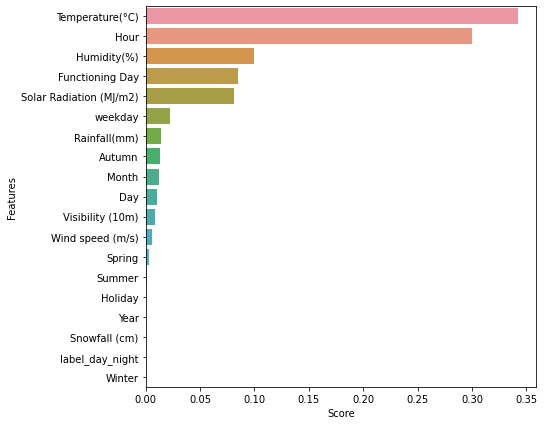

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(x=features['Score'],y=features['Features'])

## **Gredient Boost model**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
#number of trees
n_estimators = [100,120]

#Maximum depth of tree
max_depth = [6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
gboost= GradientBoostingRegressor()
gb_grid =GridSearchCV(estimator=gboost, param_grid = param_dict,cv = 5, verbose=2)
gb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=   1.8s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=   1.9s
[CV] max_depth=6, min_samples_leaf=40, mi

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...ange=None,
                  

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 120}

In [ ]:
gb_boost_with_best_perams= GradientBoostingRegressor(max_depth= 8,
 min_samples_leaf= 40,
 min_samples_split = 50,
 n_estimators = 120)
gb_boost_with_best_perams.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=40, min_samples_split=50,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Gredient boost score on train data
gb_boost_with_best_perams.score(x_train,y_train)

0.9593485852482636

In [ ]:
#Gredient boost score on test data
gb_boost_with_best_perams.score(x_test,y_test)

0.9132447981517661

In [ ]:
# Performance on Test Dataset
print(f"r-square score on test data :{r2_score(y_test,gb_boost_with_best_perams.predict(x_test))}")
print(f"adjusted r-square score on test data :{1-(1-r2_score((y_test),gb_boost_with_best_perams.predict(x_test)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))}")
print(f"homogeneity score on test data :{met.homogeneity_score(y_test,gb_boost_with_best_perams.predict(x_test))}")
print(f"mean squared error score on test data :{met.mean_squared_error(y_test,gb_boost_with_best_perams.predict(x_test))}")


r-square score on test data :0.9132447981517661
adjusted r-square score on test data :0.9122930955910753
homogeneity score on test data :1.0
mean squared error score on test data :34385.66494095365


Error Rates were very high in other models. Gredient boost trains ensembles on errors rates so, it has better scores.

## **Shap Plots**

In [ ]:
explainer = shap.Explainer(gb_boost_with_best_perams,x_train)
shap_value = explainer(x_train)

 99%|===================| 6970/7008 [00:55<00:00]       

In [ ]:
shap_value.shape

(7008, 19)

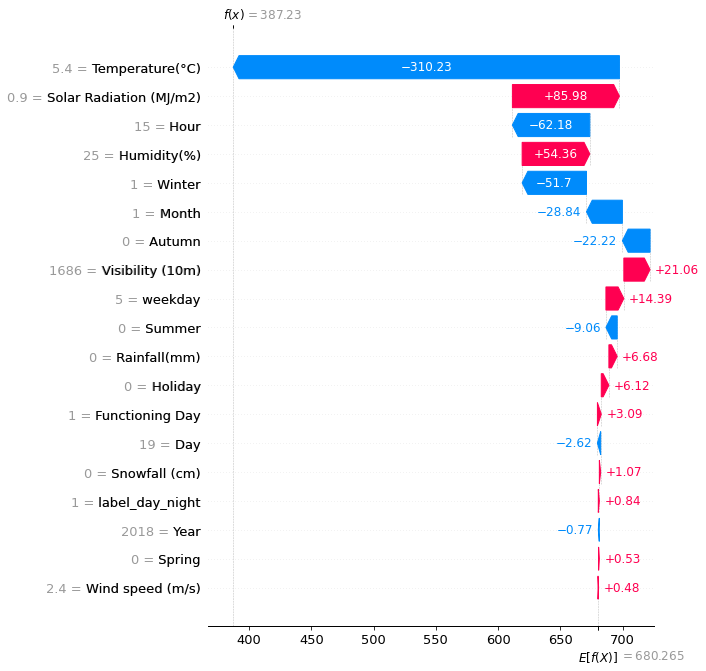

In [ ]:
shap.plots.waterfall(shap_value[0],max_display=50)

Waterfall plots are designed to display explanations for individual predictions.

The bottom of a waterfall plot starts as the expected value of the model output, and then each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction.

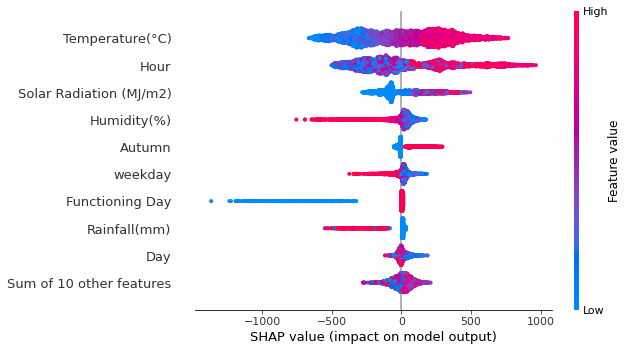

In [ ]:
shap.plots.beeswarm(shap_value)

The beeswarm plot is designed to display an information-dense summary of how the top features in a dataset impact the model’s output.

The x position of the dot is determined by the SHAP value (shap_values.value[instance,feature]) of that feature, and dots “pile up” along each feature row to show density. 

Color is used to display the original value of a feature (shap_values.data[instance,feature]). 

In the plot above we can see that **Hour** is the most important feature on average.

In [ ]:
shap.initjs()
shap.plots.force(shap_value[0])


features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

## **Conclusion**

1.As it was stated in the problem statement,the business was just started in 2017.So the number of bikes rented in 2017 were very less & the business grew exponentially from January 2018.

2.People have booked more bikes in the morning than evening.

3.In the morning 8AM and in evening 6PM has the highest demands, as the people might be going to tehir work at morning 8AM and returing from their work at the evening 6PM.

4.In the morning 8AM and in evening 6PM has the highest demands.

5.No holiday or working days have the more demands.

6.When the rainfall was less, people have booked more bikes except few cases(20mm rainfall).

7.The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.

8.After trying combinations of features with linear regression the model underfitted. It seemed obvious because data is spread too much. It didn't seem practical to fit a line.

9.With Decision tree we reached at the model r squared value of 0.84. We only fitted with minimum number of leaf hyperparameter. 

10.Gredient boost helped us to get the best accuracy to approximate numbers of rented bikes demand. Gredient boost score on train dataset was 0.95 and for test dataset was 0.91. The r^2 score for the same was 0.91.

11.The Feature_importance was almost the same in both the tree based models. Gredient boost fine-tunes with error of the prior trees this is why it gave better accuracies.